<div style="display: flex; align-items: center;">
    <img alt="udeA logo" height="140px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" style="width:107px;height:152px; margin-right: 40px;">
    <div style="text-align: center;">
        <h1><b><font color='0B5345'>Sistema Predictor de grupos relacionados por el diagnóstico</font></b></h1>
        <h2><font color='0B5345'>Luisa Enciso - María Ostos - Santiago Rivera</font></h2>
    </div>
</div>


In [1]:
import pandas as pd
import numpy as np
import unicodedata

<hr>
<h2>Inspección de la base de datos</h2>

In [2]:
# Ruta del archivo Excel
archivo_excel = 'DataBase.xlsx'
# Cargar el archivo Excel
df = pd.read_excel(archivo_excel, engine='openpyxl')
# Mostrar las primeras filas
df.head()

,Num caso,Aseguradora -Código-,Aseguradora -Descripción-,Edad,Grupo Edad,Sexo,Codigo de ciudad,Fecha de ingreso,Tipo de ingreso,Fecha de egreso,...,Proc28,Proc29,Proc30,Tipo servicio,Causa Basica de muerte,Infecciones,Infección Quirurgica,GRD -Código,GRD -Descripción,Tipo GRD
0,413799.0,204,Aseguradora_29,38,35-39,F,5001,30052005,URGENCIA,19062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,14143,MH ACCIDENTE VASCULAR CEREBRAL CON INFARTO w/MCC,M
1,412359.0,313,Aseguradora_56,27,25-29,M,5088,11032005,URGENCIA,10042005,...,NaN,NaN,NaN,NO APLICA,NaN,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
2,412552.0,313,Aseguradora_56,39,35-39,M,5001,20032005,URGENCIA,10042005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
3,414131.0,227,Aseguradora_46,24,20-24,M,5001,20062005,URGENCIA,22062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
4,410573.0,227,Aseguradora_46,60,60-64,M,5001,24112004,URGENCIA,7012005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184112,MH INFECCIONES POST OPERATORIAS Y POSTRAUMÁTIC...,M


<hr>
<h2>Limpieza de la base de datos</h2>

In [3]:
# ================================================================
# 2. LIMPIEZA BÁSICA DE TEXTO
# ================================================================
# Convertimos los valores de texto a mayúsculas y eliminamos tildes.
# Esta limpieza solo se aplica a columnas tipo string (evita modificar columnas numéricas).
# También se limpia el nombre de las columnas.
# ================================================================

import unicodedata

def limpiar_texto(texto):
    if isinstance(texto, str):
        texto = texto.upper()
        texto = unicodedata.normalize('NFKD', texto)
        texto = ''.join([c for c in texto if not unicodedata.combining(c)])
        return texto
    return texto

# Aplicar solo a columnas de texto
columnas_texto = df.select_dtypes(include='object').columns
df[columnas_texto] = df[columnas_texto].applymap(limpiar_texto)

# Limpiar nombres de columnas
df.columns = [limpiar_texto(col) for col in df.columns]

print("✅ Limpieza de texto aplicada solo a columnas tipo string.")
df.head()


<ipython-input-3-2925417561>:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columnas_texto] = df[columnas_texto].applymap(limpiar_texto)


✅ Limpieza de texto aplicada solo a columnas tipo string.


,NUM CASO,ASEGURADORA -CODIGO-,ASEGURADORA -DESCRIPCION-,EDAD,GRUPO EDAD,SEXO,CODIGO DE CIUDAD,FECHA DE INGRESO,TIPO DE INGRESO,FECHA DE EGRESO,...,PROC28,PROC29,PROC30,TIPO SERVICIO,CAUSA BASICA DE MUERTE,INFECCIONES,INFECCION QUIRURGICA,GRD -CODIGO,GRD -DESCRIPCION,TIPO GRD
0,413799.0,204,ASEGURADORA_29,38,35-39,F,5001,30052005,URGENCIA,19062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,14143,MH ACCIDENTE VASCULAR CEREBRAL CON INFARTO W/MCC,M
1,412359.0,313,ASEGURADORA_56,27,25-29,M,5088,11032005,URGENCIA,10042005,...,NaN,NaN,NaN,NO APLICA,NaN,NO,NO,184153,MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...,M
2,412552.0,313,ASEGURADORA_56,39,35-39,M,5001,20032005,URGENCIA,10042005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...,M
3,414131.0,227,ASEGURADORA_46,24,20-24,M,5001,20062005,URGENCIA,22062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...,M
4,410573.0,227,ASEGURADORA_46,60,60-64,M,5001,24112004,URGENCIA,7012005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184112,MH INFECCIONES POST OPERATORIAS Y POSTRAUMATIC...,M


In [4]:
# ================================================================
# 3. ANÁLISIS DE CALIDAD DE COLUMNAS
# ================================================================
# Reportamos:
# - Valores nulos por columna
# - Número de valores únicos
# - Ejemplo de valores
# - Columnas poco útiles
# ================================================================

print('--- Valores NaN por columna ---')
print(df.isna().sum())

descripcion_columnas = []
for col in df.columns:
    valores_unicos = df[col].nunique(dropna=True)
    muestra_valores = df[col].unique()[:5]
    descripcion_columnas.append({
        'columna': col,
        'valores_unicos': valores_unicos,
        'muestra_valores': muestra_valores
    })

print('\n--- Resumen de columnas ---')
for desc in descripcion_columnas:
    print(f"Columna: {desc['columna']}")
    print(f"  Valores únicos: {desc['valores_unicos']}")
    print(f"  Ejemplo de valores: {desc['muestra_valores']}")
    if desc['valores_unicos'] == 1:
        print('  -> ¡OJO! Solo hay un valor único.')
    print()
df.head()

--- Valores NaN por columna ---
NUM CASO                     1
ASEGURADORA -CODIGO-         0
ASEGURADORA -DESCRIPCION-    0
EDAD                         0
GRUPO EDAD                   0
                            ..
INFECCIONES                  0
INFECCION QUIRURGICA         0
GRD -CODIGO                  0
GRD -DESCRIPCION             0
TIPO GRD                     0
Length: 68, dtype: int64

--- Resumen de columnas ---
Columna: NUM CASO
  Valores únicos: 7900
  Ejemplo de valores: [413799. 412359. 412552. 414131. 410573.]

Columna: ASEGURADORA -CODIGO-
  Valores únicos: 62
  Ejemplo de valores: [204 313 227 112 221]

Columna: ASEGURADORA -DESCRIPCION-
  Valores únicos: 71
  Ejemplo de valores: ['ASEGURADORA_29' 'ASEGURADORA_56' 'ASEGURADORA_46' 'ASEGURADORA_21'
 'ASEGURADORA_28']

Columna: EDAD
  Valores únicos: 108
  Ejemplo de valores: [38 27 39 24 60]

Columna: GRUPO EDAD
  Valores únicos: 20
  Ejemplo de valores: ['35-39' '25-29' '20-24' '60-64' '75-79']

Columna: SEXO
  Valore

,NUM CASO,ASEGURADORA -CODIGO-,ASEGURADORA -DESCRIPCION-,EDAD,GRUPO EDAD,SEXO,CODIGO DE CIUDAD,FECHA DE INGRESO,TIPO DE INGRESO,FECHA DE EGRESO,...,PROC28,PROC29,PROC30,TIPO SERVICIO,CAUSA BASICA DE MUERTE,INFECCIONES,INFECCION QUIRURGICA,GRD -CODIGO,GRD -DESCRIPCION,TIPO GRD
0,413799.0,204,ASEGURADORA_29,38,35-39,F,5001,30052005,URGENCIA,19062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,14143,MH ACCIDENTE VASCULAR CEREBRAL CON INFARTO W/MCC,M
1,412359.0,313,ASEGURADORA_56,27,25-29,M,5088,11032005,URGENCIA,10042005,...,NaN,NaN,NaN,NO APLICA,NaN,NO,NO,184153,MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...,M
2,412552.0,313,ASEGURADORA_56,39,35-39,M,5001,20032005,URGENCIA,10042005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...,M
3,414131.0,227,ASEGURADORA_46,24,20-24,M,5001,20062005,URGENCIA,22062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...,M
4,410573.0,227,ASEGURADORA_46,60,60-64,M,5001,24112004,URGENCIA,7012005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184112,MH INFECCIONES POST OPERATORIAS Y POSTRAUMATIC...,M


In [5]:
# ================================================================
# 4. NORMALIZACIÓN DE VALORES EQUIVALENTES
# ================================================================
# Homogeneizamos los valores que representan lo mismo pero están escritos diferente.
# Ejemplo: "URGENCIAS PEDIATRICAS" → "URGENCIA"
# ================================================================

normalizaciones = {
    'TIPO DE INGRESO': {
        'URGENCIAS': 'URGENCIA',
        'URGENCIA ADULTOS': 'URGENCIA',
        'U. ADULTOS': 'URGENCIA',
        'URGENCIA PEDIATRICA': 'URGENCIA',
        'URGENCIA OBSTETRICA': 'URGENCIA',
    },
    'SITUACION AL ALTA': {
        'MUERTO': 'FALLECIDO',
        'DEFUNCION': 'FALLECIDO',
    },
    'SERVICIOALTA': {
        'URGENCIAS': 'URGENCIA',
        'U. ADULTOS': 'URGENCIA',
    }
}

for columna, reemplazos in normalizaciones.items():
    if columna in df.columns:
        df[columna] = df[columna].replace(reemplazos)

print("✅ Valores equivalentes normalizados.")
df.head()

✅ Valores equivalentes normalizados.


,NUM CASO,ASEGURADORA -CODIGO-,ASEGURADORA -DESCRIPCION-,EDAD,GRUPO EDAD,SEXO,CODIGO DE CIUDAD,FECHA DE INGRESO,TIPO DE INGRESO,FECHA DE EGRESO,...,PROC28,PROC29,PROC30,TIPO SERVICIO,CAUSA BASICA DE MUERTE,INFECCIONES,INFECCION QUIRURGICA,GRD -CODIGO,GRD -DESCRIPCION,TIPO GRD
0,413799.0,204,ASEGURADORA_29,38,35-39,F,5001,30052005,URGENCIA,19062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,14143,MH ACCIDENTE VASCULAR CEREBRAL CON INFARTO W/MCC,M
1,412359.0,313,ASEGURADORA_56,27,25-29,M,5088,11032005,URGENCIA,10042005,...,NaN,NaN,NaN,NO APLICA,NaN,NO,NO,184153,MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...,M
2,412552.0,313,ASEGURADORA_56,39,35-39,M,5001,20032005,URGENCIA,10042005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...,M
3,414131.0,227,ASEGURADORA_46,24,20-24,M,5001,20062005,URGENCIA,22062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...,M
4,410573.0,227,ASEGURADORA_46,60,60-64,M,5001,24112004,URGENCIA,7012005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184112,MH INFECCIONES POST OPERATORIAS Y POSTRAUMATIC...,M


In [6]:
# ================================================================
# 5. ELIMINACIÓN DE COLUMNAS PROBLEMÁTICAS
# ================================================================
# - Eliminamos columnas con >70% NaN
# - Eliminamos columnas con un solo valor único
# - Eliminamos columnas administrativas poco relevantes
# ================================================================

# Columnas con muchos nulos
umbral_nan = 0.7
columnas_a_eliminar = df.columns[df.isna().mean() > umbral_nan].tolist()

# Columnas con un solo valor
columnas_un_valor = [col for col in df.columns if df[col].nunique() == 1]

# Columnas irrelevantes conocidas
columnas_irrelevantes = [
    'NUM CASO', 'ASEGURADORA -CODIGO-', 'ASEGURADORA -DESCRIPCION-', 'CODIGO DE CIUDAD',
    'FECHA DE EGRESO', 'CODIGO CAUSA EXTERNA', 'DIAS ESTANCIA', 'SERVICIOALTA',
    'CUIDADOS INTENSIVOS', 'DIAS DE UNIDAD CUIDADO INTENSIVO',
    'SITUACION AL ALTA', 'CAUSA BASICA DE MUERTE', 'INFECCIONES',
    'INFECCION QUIRURGICA', 'DX PRINCIPAL DE EGRESO ', 'DX PRINCIPAL DE EGRESO .1',
    'TIPO SERVICIO', 'PROC1','PROC2','PROC3', 'GRD -DESCRIPCION', 'TIPO GRD','GRUPO EDAD','DX DE INGRESO'
]

# Unificamos y eliminamos
todas_a_eliminar = list(set(columnas_a_eliminar + columnas_un_valor + columnas_irrelevantes))
df = df.drop(columns=[col for col in todas_a_eliminar if col in df.columns])
print(f"Columnas eliminadas: {todas_a_eliminar}")
df.head()

Columnas eliminadas: ['DXR 10 ', 'PROC2', 'PROC4', 'PROC15', 'DX DE INGRESO', 'SITUACION AL ALTA', 'GRD -DESCRIPCION', 'PROC17', 'PROC19', 'PROC29', 'PROC11', 'CAUSA BASICA DE MUERTE', 'DX PRINCIPAL DE EGRESO .1', 'CODIGO DE CIUDAD', 'FECHA DE EGRESO', 'PROC28', 'CODIGO CAUSA EXTERNA', 'PROC8', 'DXR 9', 'PROC10', 'PROC1', 'PROC21', 'PROC30', 'INFECCIONES', 'PROC6', 'PROC25', 'PROC9', 'PROC12', 'PROC7', 'CAUSA EXTERNA', 'TIPO SERVICIO', 'PROC22', 'TIPO GRD', 'ASEGURADORA -CODIGO-', 'INFECCION QUIRURGICA', 'PROC5', 'DXR 8', 'DXR 7', 'NUM CASO', 'PROC18', 'DIAS ESTANCIA', 'GRUPO EDAD', 'PROC24', 'DIAS DE UNIDAD CUIDADO INTENSIVO', 'PROC13', 'PROC14', 'PROC20', 'PROC26', 'CUIDADOS INTENSIVOS', 'PROC23', 'SERVICIOALTA', 'DX PRINCIPAL DE EGRESO ', 'PROC16', 'PROC27', 'ASEGURADORA -DESCRIPCION-', 'PROC3']


,EDAD,SEXO,FECHA DE INGRESO,TIPO DE INGRESO,DX PPAL 3 CARACTERES,DXR 1,DXR 2,DXR 3,DXR 4,DXR 5,DXR-6,GRD -CODIGO
0,38,F,30052005,URGENCIA,INFARTO CEREBRAL,I652,C189,C787,C788,N390,A048,14143
1,27,M,11032005,URGENCIA,ENFERMEDAD POR VIRUS DE LA INMUNODEFICIENCIA H...,B210,B204,B162,A530,D538,A071,184153
2,39,M,20032005,URGENCIA,ENFERMEDAD POR VIRUS DE LA INMUNODEFICIENCIA H...,B451,G052,B588,D70,D698,A072,184153
3,24,M,20062005,URGENCIA,ENFERMEDAD POR VIRUS DE LA INMUNODEFICIENCIA H...,B200,B210,A600,N518,A530,A073,184153
4,60,M,24112004,URGENCIA,COMPLICACIONES DE PROCEDIMIENTOS NO CLASIFICAD...,Y838,C140,N390,B961,B962,A099,184112


In [7]:
# ================================================================
# 6. CODIFICACIÓN DE VARIABLES
# ================================================================
# - Variables binarias: codificamos con 0 y 1.
# - Variables categóricas frecuentes: codificamos por frecuencia.
# ================================================================

from sklearn.preprocessing import MinMaxScaler

# Codificación binaria
df['SEXO'] = df['SEXO'].map({'F': 0, 'M': 1})
df['TIPO DE INGRESO'] = df['TIPO DE INGRESO'].map({'PROGRAMADO': 0, 'URGENCIA': 1})

# Codificación por frecuencia
columnas_frecuencia = [
    'EDAD', 'FECHA DE INGRESO', 'DX DE INGRESO', 'DX PPAL 3 CARACTERES',
    'DXR 1', 'DXR 2', 'DXR 3', 'DXR 4', 'DXR 5', 'DXR-6','GRD -CODIGO'
]
for col in columnas_frecuencia:
    if col in df.columns:
        df[col] = df[col].map(df[col].value_counts())
df.head()


,EDAD,SEXO,FECHA DE INGRESO,TIPO DE INGRESO,DX PPAL 3 CARACTERES,DXR 1,DXR 2,DXR 3,DXR 4,DXR 5,DXR-6,GRD -CODIGO
0,200,0,81,1,92,26.0,18.0,21.0,3.0,95.0,2.0,54
1,231,1,85,1,13,8.0,7.0,1.0,9.0,7.0,1.0,59
2,176,1,88,1,10,2.0,2.0,1.0,78.0,10.0,1.0,59
3,251,1,64,1,127,11.0,3.0,10.0,8.0,2.0,1.0,59
4,408,1,2,1,226,269.0,1.0,256.0,77.0,71.0,31.0,55


In [8]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 1. Reemplazar NaN por 0
df_clean = df.fillna(0)

# 2. Aumentar ligeramente los valores para que el 1 no quede en el mínimo
epsilon = 1e-3  # Pequeño valor positivo para evitar que 1 se convierta en 0
df_adjusted = df_clean + epsilon

# 3. Normalización Min-Max
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_adjusted)

# 4. Crear DataFrame con nombres originales
df_f = pd.DataFrame(df_scaled, columns=df.columns)

# 5. Confirmación
print("✅ Normalización Min-Max aplicada (evitando que 1 se convierta en 0).")
df_f.head()


✅ Normalización Min-Max aplicada (evitando que 1 se convierta en 0).


,EDAD,SEXO,FECHA DE INGRESO,TIPO DE INGRESO,DX PPAL 3 CARACTERES,DXR 1,DXR 2,DXR 3,DXR 4,DXR 5,DXR-6,GRD -CODIGO
0,0.336717,0.0,0.720721,1.0,0.066423,0.018895,0.009793,0.012774,0.002669,0.135714,0.003781,0.072503
1,0.389171,1.0,0.756757,1.0,0.008759,0.005814,0.003808,0.000608,0.008007,0.010000,0.001890,0.079343
2,0.296108,1.0,0.783784,1.0,0.006569,0.001453,0.001088,0.000608,0.069395,0.014286,0.001890,0.079343
3,0.423012,1.0,0.567568,1.0,0.091971,0.007994,0.001632,0.006083,0.007117,0.002857,0.001890,0.079343
4,0.688663,1.0,0.009009,1.0,0.164234,0.195494,0.000544,0.155718,0.068505,0.101429,0.058601,0.073871



📊 Modelo: Logistic Regression
Accuracy: 0.1093


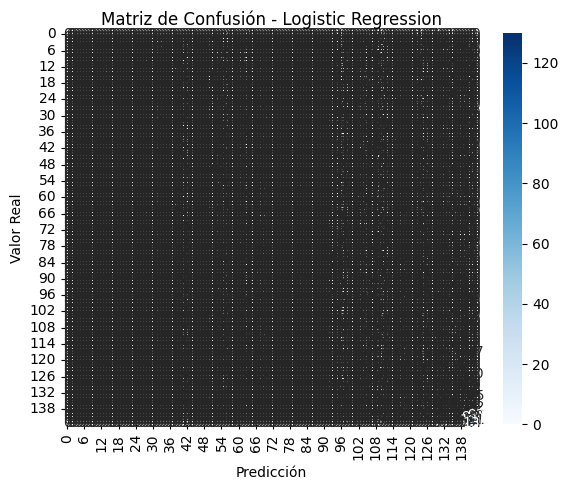


📊 Modelo: Decision Tree
Accuracy: 0.3105


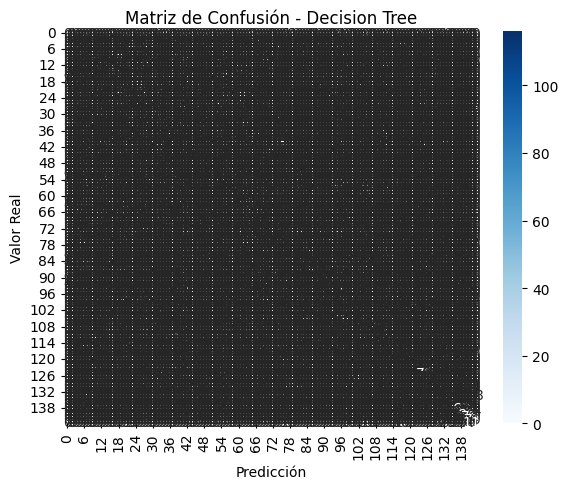


📊 Modelo: Random Forest
Accuracy: 0.2847


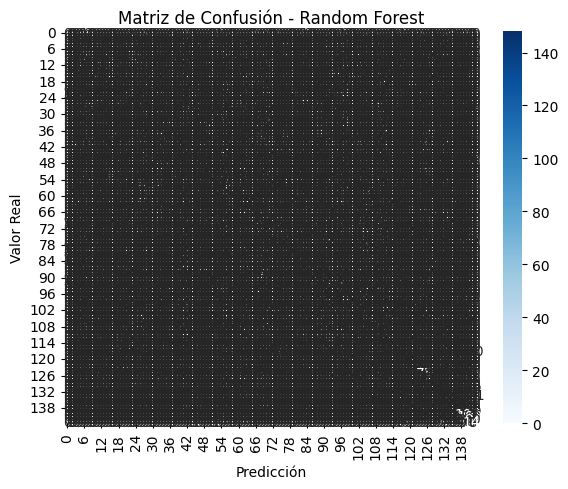


📊 Modelo: K-Nearest Neighbors
Accuracy: 0.1143


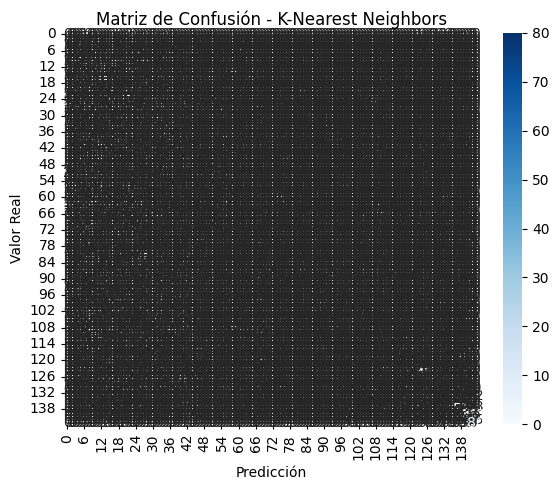


=== Comparación de Accuracy ===
Logistic Regression: 0.1093
Decision Tree: 0.3105
Random Forest: 0.2847
K-Nearest Neighbors: 0.1143


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ============================================================================
# ETAPA 1: Selección de variables predictoras (X) y variable objetivo (y)
# ============================================================================
# Usamos el DataFrame ya normalizado (df_f) para X.
# La salida (y) es 'GRD -CODIGO', sin normalizar.
X = df_f.drop(columns=['GRD -CODIGO'])
y = df['GRD -CODIGO']  # La etiqueta original (no normalizada)

# ============================================================================
# ETAPA 2: Imputación de valores faltantes en X (solo si hay NaNs)
# ============================================================================
# Algunos modelos (como LogisticRegression) no aceptan NaNs.
# Imputamos con la media para variables numéricas.
imputer = SimpleImputer(strategy='mean')
X_imputado = imputer.fit_transform(X)

# Restauramos X como DataFrame con sus columnas originales
X = pd.DataFrame(X_imputado, columns=X.columns)

# ============================================================================
# ETAPA 3: División del dataset en entrenamiento y prueba
# ============================================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ============================================================================
# ETAPA 4: Definición de modelos de clasificación
# ============================================================================
modelos = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# ============================================================================
# ETAPA 5: Entrenamiento, predicción y evaluación de cada modelo
# ============================================================================
resultados = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    resultados[nombre] = acc

    # Resultados individuales por modelo
    print(f"\n📊 Modelo: {nombre}")
    print(f"Accuracy: {acc:.4f}")

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Valor Real")
    plt.tight_layout()
    plt.show()

# ============================================================================
# ETAPA 6: Comparación general de accuracy entre modelos
# ============================================================================
print("\n=== Comparación de Accuracy ===")
for nombre, acc in resultados.items():
    print(f"{nombre}: {acc:.4f}")


In [ ]:
print("Número de clases:", y.nunique())
print("Distribución de clases:")
print(y.value_counts(normalize=True).head(10))


Número de clases: 144
Distribución de clases:
GRD -CODIGO
732    0.026266
691    0.024795
631    0.022642
578    0.020740
433    0.015537
203    0.014568
42     0.013563
123    0.013241
363    0.013025
120    0.012918
Name: proportion, dtype: float64


Nuevas clases: 118
GRD -CODIGO
OTROS    2200
732       732
691       691
631       631
578       578
         ... 
21        105
35        105
52        104
104       104
34        102
Name: count, Length: 118, dtype: int64


**Guardar Base de datos organizada**

DESCRIBIR QUE SE ORGANIZO

In [ ]:
# ================================================================
# 8. GUARDADO FINAL
# ================================================================
# Guardamos el DataFrame limpio y normalizado para futuras etapas del pipeline.
# ================================================================

df_normalized.to_csv('DataBaseFinal_Normalizado.csv', index=False, sep=';')
print("💾 Archivo guardado como 'DataBaseFinal_Normalizado.csv'")


CSV con datos organizados y NaN reemplazados guardado como: DataBaseOrganizado.csv


**ESCRIBIR PORQUE ELIMINAR ESTAS CARACTERISTICAS**

<hr>
<h1> Árbol de decisión </h1>

<hr>
<h1> Random Forest </h1>

<hr>
<h1> OTRO ALGORITMO </h1>

<hr>
<h1> Comparación de los algoritmos </h1>

<hr>
<h2> Conclusiones </h2>